In [58]:
#INE062A01020
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

In [1]:

import upstox_client 
import pandas as pd
import numpy as np


In [159]:
api_instance = upstox_client.HistoryApi()
instrument_key = 'NSE_EQ|INE238A01034'#SBIN str | Key of the instrument NSE_EQ|INE238A01034,NSE_INDEX|Nifty Bank 
bank="axis"
interval = 'day'
to_date ='2023-12-30'
from_date ='2007-01-01'
api_version = '2.0' # str | API Version Header
api_response = api_instance.get_historical_candle_data1(instrument_key,interval,to_date,from_date,api_version)

In [160]:
data=api_response.data.candles
data

[['2023-12-29T00:00:00+05:30', 1101.45, 1106.85, 1093.95, 1102.3, 8786731, 0],
 ['2023-12-28T00:00:00+05:30', 1107.25, 1113, 1098, 1107.85, 14097667, 0],
 ['2023-12-27T00:00:00+05:30', 1096.05, 1110.55, 1089.65, 1106.35, 6132936, 0],
 ['2023-12-26T00:00:00+05:30', 1091.2, 1100.65, 1086.7, 1094.25, 5687517, 0],
 ['2023-12-22T00:00:00+05:30', 1095.4, 1106.3, 1085.8, 1088.3, 10600025, 0],
 ['2023-12-21T00:00:00+05:30', 1103.9, 1103.9, 1077.2, 1095.4, 10914682, 0],
 ['2023-12-20T00:00:00+05:30', 1122, 1123.85, 1102.7, 1110.25, 9848057, 0],
 ['2023-12-19T00:00:00+05:30', 1123.8, 1126.85, 1114.2, 1120.25, 6824641, 0],
 ['2023-12-18T00:00:00+05:30', 1119.7, 1120, 1107.2, 1111.35, 7922468, 0],
 ['2023-12-15T00:00:00+05:30', 1119.2, 1127.85, 1108.6, 1120.35, 12048410, 0],
 ['2023-12-14T00:00:00+05:30', 1132.4, 1138.6, 1117.9, 1120.45, 9421193, 0],
 ['2023-12-13T00:00:00+05:30', 1150, 1151, 1111.45, 1114.85, 8184523, 0],
 ['2023-12-12T00:00:00+05:30', 1120, 1133.9, 1109, 1131, 9044111, 0],
 ['20

In [161]:
# data.reverse()
data=np.array(data)

In [162]:
data=pd.DataFrame(data,columns=["Date","open","high","low","close","volume","unknown"])
data['Date']=data['Date'].apply(lambda x : x.split("T")[0])
# data['Date']=data['Date'].apply(lambda x :datetime.strptime(x, '%Y-%m-%d').date())

In [163]:
data.to_csv(f'web_interface/{bank}.csv',index=False)

In [164]:
# df.index = df["Date"]
# del df['Unknown']
# del df['Date']
# df.index=df.index.str.replace("T.*05:30","",regex=True)
data=pd.read_csv(f"web_interface/{bank}.csv")
data=data.loc[::-1]
data['Date']=data['Date'].apply(lambda x :datetime.strptime(x, '%Y-%m-%d').date())
data.index=data.pop("Date")
df1=data['close']
train_size=int(len(df1)*0.7)
valid_point=int(len(df1)*0.8)
test_size=len(df1)-valid_point
train_data,valid_data,test_data=df1[:train_size],df1[train_size:valid_point],df1[valid_point:]

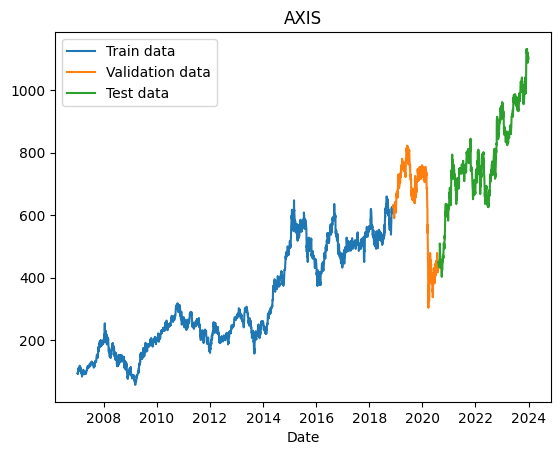

In [165]:
data[:train_size]['close'].plot.line(use_index= True)
data[train_size:valid_point]['close'].plot.line(use_index= True)
data[valid_point:]['close'].plot.line(use_index= True)
plt.legend(["Train data","Validation data","Test data"])
plt.title(f"{bank.upper()}")
plt.savefig(f'web_interface/static/{bank}_data.jpg')

In [48]:
# import matplotlib.pyplot as plt
# df.plot.line(y="Close", use_index= True)
data['open']

Date
2023-12-29     645.5
2023-12-28    650.25
2023-12-27    640.75
2023-12-26    638.85
2023-12-22    644.75
               ...  
2007-01-08    124.88
2007-01-05     124.1
2007-01-04       127
2007-01-03       125
2007-01-02       125
Name: open, Length: 4210, dtype: object

In [59]:
df["Tomorrow"] = df["Close"].shift(-1)

In [61]:
df.isnull()

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2007-01-02,False,False,False,False,False,False
2007-01-03,False,False,False,False,False,False
2007-01-04,False,False,False,False,False,False
2007-01-05,False,False,False,False,False,False
2007-01-08,False,False,False,False,False,False
...,...,...,...,...,...,...
2023-11-29,False,False,False,False,False,False
2023-11-30,False,False,False,False,False,False
2023-12-01,False,False,False,False,False,False


In [62]:
df.dropna(axis=0)

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2007-01-02,125.00,126.00,124.30,125.36,4081440,126.49
2007-01-03,125.00,126.99,123.71,126.49,6825540,124.30
2007-01-04,127.00,128.00,123.72,124.30,6544400,124.41
2007-01-05,124.10,125.78,123.31,124.41,6962270,121.37
2007-01-08,124.88,124.88,120.71,121.37,8747010,117.49
...,...,...,...,...,...,...
2023-11-28,563.60,565.20,561.10,564.45,8153314,568.60
2023-11-29,568.00,569.00,565.10,568.60,10299034,564.75
2023-11-30,569.75,570.20,563.65,564.75,19758998,571.75


In [63]:
df.isna().sum()

Open        0
High        0
Low         0
Close       0
Volume      0
Tomorrow    1
dtype: int64

In [64]:
df["Target"] = (df['Tomorrow'] > df['Close']).astype(int)

In [65]:
df

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2007-01-02,125.00,126.00,124.30,125.36,4081440,126.49,1
2007-01-03,125.00,126.99,123.71,126.49,6825540,124.30,0
2007-01-04,127.00,128.00,123.72,124.30,6544400,124.41,1
2007-01-05,124.10,125.78,123.31,124.41,6962270,121.37,0
2007-01-08,124.88,124.88,120.71,121.37,8747010,117.49,0
...,...,...,...,...,...,...,...
2023-11-29,568.00,569.00,565.10,568.60,10299034,564.75,0
2023-11-30,569.75,570.20,563.65,564.75,19758998,571.75,1
2023-12-01,567.00,574.20,566.55,571.75,10614230,594.70,1


In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = df.iloc[:-100]
test = df.iloc[-100:]



In [68]:
predictors = ['Close']


In [69]:
train[predictors]

,Close
Date,
2007-01-02,125.36
2007-01-03,126.49
2007-01-04,124.30
2007-01-05,124.41
2007-01-08,121.37
...,...
2023-07-05,590.60
2023-07-06,592.50
2023-07-07,593.60


In [70]:
model.fit(train[predictors], train['Target'])


RandomForestClassifier(min_samples_split=100, random_state=1)

,Close,Volume,Open,High,Low
Date,,,,,
2023-07-12,589.25,16029716,589.00,594.50,588.20
2023-07-13,585.65,20024503,594.90,598.00,583.35
2023-07-14,584.40,12190152,586.75,591.30,580.70
2023-07-17,601.10,19378986,587.00,602.85,584.20
2023-07-18,592.35,25757209,603.05,604.05,588.75
...,...,...,...,...,...
2023-11-29,568.60,10299034,568.00,569.00,565.10
2023-11-30,564.75,19758998,569.75,570.20,563.65
2023-12-01,571.75,10614230,567.00,574.20,566.55


In [71]:
from sklearn.metrics import precision_score

In [72]:
preds = model.predict(test[predictors])

In [74]:
preds = pd.Series(preds , index=test.index)

In [75]:
preds

Date
2023-07-12    1
2023-07-13    1
2023-07-14    1
2023-07-17    0
2023-07-18    1
             ..
2023-11-29    0
2023-11-30    1
2023-12-01    1
2023-12-04    1
2023-12-05    0
Length: 100, dtype: int32

In [76]:
precision_score(test['Target'],preds)

0.6027397260273972

In [77]:
combined = pd.concat([test["Target"], preds], axis=1)

<Axes: xlabel='Date'>

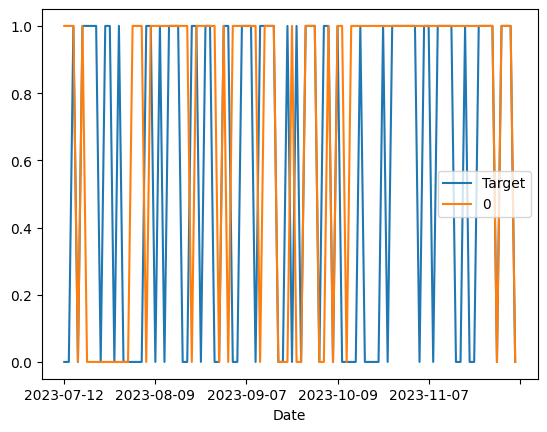

In [78]:
combined.plot()

In [79]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [80]:
def backtest(data, model, predictors, start=2000, step=252):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [81]:
predictions = backtest(df, model, predictors)

In [82]:
predictions["Predictions"].value_counts()

Predictions
0    1239
1     954
Name: count, dtype: int64

In [83]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5335429769392034

In [84]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.509804
0    0.490196
Name: count, dtype: float64

In [35]:
print(df.dtypes)

Open        float64
High        float64
Low         float64
Close       float64
Volume        int64
Tomorrow    float64
Target        int32
dtype: object


In [36]:
df = df.dropna(subset=['Close'])
df

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2007-01-02,125.00,126.00,124.30,125.36,4081440,126.49,1
2007-01-03,125.00,126.99,123.71,126.49,6825540,124.30,0
2007-01-04,127.00,128.00,123.72,124.30,6544400,124.41,1
2007-01-05,124.10,125.78,123.31,124.41,6962270,121.37,0
2007-01-08,124.88,124.88,120.71,121.37,8747010,117.49,0
...,...,...,...,...,...,...,...
2023-11-29,568.00,569.00,565.10,568.60,10299034,564.75,0
2023-11-30,569.75,570.20,563.65,564.75,19758998,571.75,1
2023-12-01,567.00,574.20,566.55,571.75,10614230,594.70,1


In [37]:
horizons = [2,5,60,252,3000]
new_predictors = []

for horizon in horizons:
    rolling_averages = df.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    df[ratio_column] = df["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    df[trend_column] = df.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

In [38]:
 df = df.dropna(subset=df.columns[df.columns != "Tomorrow"])
df

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_252,Trend_252,Close_Ratio_3000,Trend_3000
Date,,,,,,,,,,,,,,,,,
2019-02-11,285.95,285.95,280.00,280.50,15420017,275.40,0,0.990291,0.0,0.982418,2.0,0.967291,28.0,1.022718,118.0,1.266834,1509.0
2019-02-12,280.65,282.20,274.65,275.40,15326106,268.20,0,0.990826,0.0,0.970846,1.0,0.950551,27.0,1.004453,117.0,1.243522,1508.0
2019-02-13,276.50,276.70,266.70,268.20,18662893,267.10,0,0.986755,0.0,0.959571,0.0,0.926764,27.0,0.978526,117.0,1.210750,1508.0
2019-02-14,268.00,268.35,263.65,267.10,26372671,262.95,0,0.997945,0.0,0.969721,0.0,0.923833,27.0,0.974875,116.0,1.205525,1507.0
2019-02-15,268.85,268.85,261.30,262.95,23366091,259.95,0,0.992171,0.0,0.970904,0.0,0.910744,26.0,0.960263,115.0,1.186542,1507.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-29,568.00,569.00,565.10,568.60,10299034,564.75,0,1.003663,2.0,1.010916,4.0,0.982229,36.0,0.990572,135.0,1.855806,1531.0
2023-11-30,569.75,570.20,563.65,564.75,19758998,571.75,1,0.996603,1.0,1.002005,4.0,0.975713,35.0,0.984168,134.0,1.842497,1530.0
2023-12-01,567.00,574.20,566.55,571.75,10614230,594.70,1,1.006159,1.0,1.010195,4.0,0.987915,35.0,0.996613,135.0,1.864570,1530.0


In [39]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)


In [40]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] =1
    preds[preds <.6] =0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [41]:
def backtest(data, model, predictors, start=1000, step=252):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [42]:
predictions = backtest(df, model, new_predictors)


In [43]:
predictions["Predictions"].value_counts()


Predictions
0.0    184
1.0      9
Name: count, dtype: int64

In [44]:
precision_score(predictions["Target"], predictions["Predictions"])


0.5555555555555556

In [45]:
predictions["Target"].value_counts() / predictions.shape[0]


Target
1    0.559585
0    0.440415
Name: count, dtype: float64

In [46]:

predictions



,Target,Predictions
Date,,
2023-02-22,1,0.0
2023-02-23,1,0.0
2023-02-24,1,0.0
2023-02-27,0,0.0
2023-02-28,1,0.0
...,...,...
2023-11-29,0,0.0
2023-11-30,1,0.0
2023-12-01,1,0.0


In [105]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
# from tensorflow.keras.models import Sequential

In [107]:

# df['close'].plot.line(use_index= True)
# df['predicted'][valid_point+31:].plot.line(use_index= True)
# plt.title("Axis bank")
# plt.legend(['Actual',"Predicted"])
# plt.show()

21/21 [==============================] - 1s 12ms/step


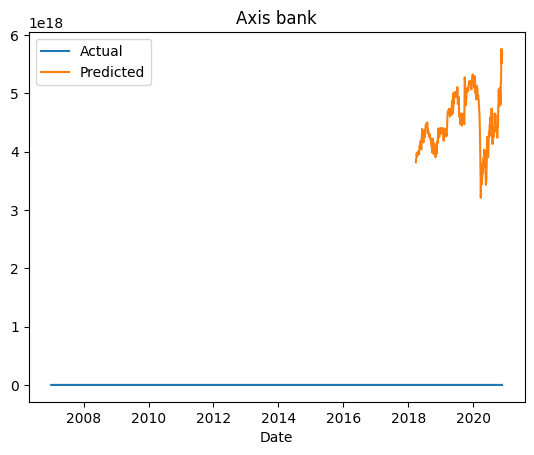

In [108]:
df['close'].plot.line(use_index= True)
df['predicted'][valid_point+31:].plot.line(use_index= True)
plt.title("Axis bank")
plt.legend(['Actual',"Predicted"])
plt.show()

In [115]:
np.nan

<module 'numpy' from 'C:\\Users\\ksrma\\anaconda3\\envs\\ml\\lib\\site-packages\\numpy\\__init__.py'>

In [116]:
df=pd.read_csv("HDFCBANK.csv")

,Date,open,high,low,close,volume,unknown
12,2020-11-04,1252.00,1264.80,1230.00,1257.40,11702411,0
13,2020-11-03,1226.45,1250.75,1225.50,1247.95,14082115,0
14,2020-11-02,1194.35,1225.00,1177.50,1215.25,10963040,0
15,2020-10-30,1182.55,1199.30,1176.35,1183.55,5761470,0
16,2020-10-29,1200.60,1204.45,1178.50,1187.20,11530152,0
...,...,...,...,...,...,...,...
3436,2007-01-08,105.40,105.40,101.65,102.50,3107030,0
3437,2007-01-05,105.47,107.39,103.42,105.69,5954670,0
3438,2007-01-04,105.60,106.50,103.50,105.00,3433420,0
3439,2007-01-03,106.80,107.00,105.31,106.53,1516050,0


datetime.date(2020, 11, 4)

In [134]:
x_test.shape

(658, 30, 1)

In [142]:
np.array(df['Date'][len(df)-30:]).reshape(1,30,1)

array([[['2007-02-14'],
        ['2007-02-13'],
        ['2007-02-12'],
        ['2007-02-09'],
        ['2007-02-08'],
        ['2007-02-07'],
        ['2007-02-06'],
        ['2007-02-05'],
        ['2007-02-02'],
        ['2007-02-01'],
        ['2007-01-31'],
        ['2007-01-29'],
        ['2007-01-25'],
        ['2007-01-24'],
        ['2007-01-23'],
        ['2007-01-22'],
        ['2007-01-19'],
        ['2007-01-18'],
        ['2007-01-17'],
        ['2007-01-16'],
        ['2007-01-15'],
        ['2007-01-12'],
        ['2007-01-11'],
        ['2007-01-10'],
        ['2007-01-09'],
        ['2007-01-08'],
        ['2007-01-05'],
        ['2007-01-04'],
        ['2007-01-03'],
        ['2007-01-02']]], dtype=object)

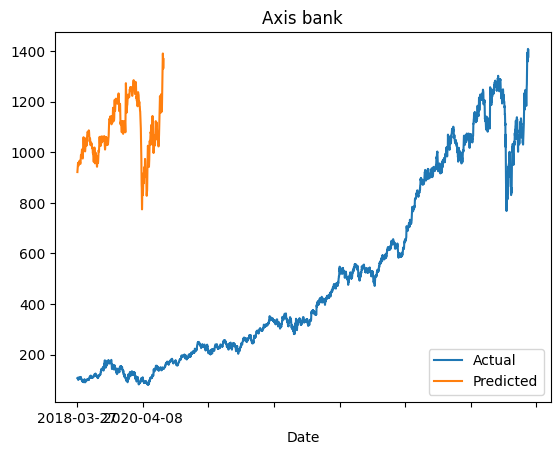

In [44]:
data=get_hist_data('NSE_EQ|INE238A01034','2021-05-21','2021-06-20')


In [45]:
data

[]